In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('C:/Users/swapn/DSP22062019/file/train_file.csv')
df_1 = df.copy() 

In [3]:
df.head()

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


In [4]:
df['Claim'].value_counts()

0    49830
1    12458
Name: Claim, dtype: int64

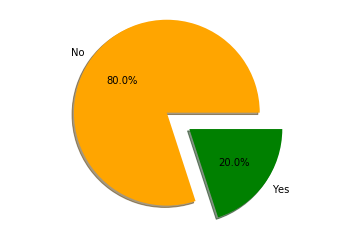

In [5]:

labels = 'No', 'Yes'
sizes = [49830, 12458]
colors = ['orange', 'green']
explode = (0.3, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
 
plt.axis('equal')
plt.show()

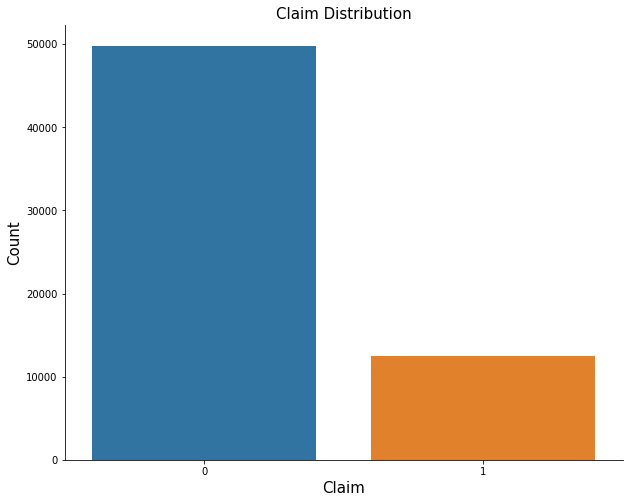

In [6]:

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'Claim', data = df)
ax.set_xlabel('Claim', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Claim Distribution', fontsize=15)
sns.despine()
# there is a class imbalance that needs to be handled

# Check number of rows and columns

In [7]:
df.shape

(62288, 12)

# Check datatypes and missing values 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
ID                      62288 non-null int64
Age                     62288 non-null int64
Agency                  62288 non-null object
Agency Type             62288 non-null object
Commision (in value)    62288 non-null float64
Destination             62288 non-null object
Distribution Channel    62288 non-null object
Duration                62288 non-null int64
Gender                  22713 non-null object
Net Sales               62288 non-null float64
Product Name            62288 non-null object
Claim                   62288 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


# Observation : So, there are 6 numerical columns and  6 categorical columns

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_columns = pd.DataFrame({'percent_missing': percent_missing})
print(missing_columns)
mask = missing_columns['percent_missing'] >50
columns = list(missing_columns[mask].index)
print(columns)
rows_percentage = (1 - (len(df.dropna(thresh=5)) / len(df)))*100
print(rows_percentage)

                      percent_missing
ID                           0.000000
Age                          0.000000
Agency                       0.000000
Agency Type                  0.000000
Commision (in value)         0.000000
Destination                  0.000000
Distribution Channel         0.000000
Duration                     0.000000
Gender                      63.535512
Net Sales                    0.000000
Product Name                 0.000000
Claim                        0.000000
['Gender']
0.0


# Observation : there are more than 50% missing value in gender column.So,we can drop the gender column

In [10]:
df.drop('Gender',axis=1,inplace=True)

In [11]:
df.isnull().sum()

ID                      0
Age                     0
Agency                  0
Agency Type             0
Commision (in value)    0
Destination             0
Distribution Channel    0
Duration                0
Net Sales               0
Product Name            0
Claim                   0
dtype: int64

In [12]:
df.describe()


,ID,Age,Commision (in value),Duration,Net Sales,Claim
count,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000
mean,32844.953458,39.666324,12.829703,60.958804,50.717064,0.200006
std,18065.417216,14.014652,23.498745,114.325330,63.166715,0.400008
min,0.000000,0.000000,0.000000,-2.000000,-389.000000,0.000000
25%,17579.000000,33.000000,0.000000,10.000000,20.000000,0.000000
50%,33446.500000,36.000000,1.880000,25.000000,29.700000,0.000000
75%,48532.250000,43.000000,14.440000,59.000000,58.000000,0.000000
max,63323.000000,118.000000,262.760000,4881.000000,682.000000,1.000000


In [13]:
df = df[df['Duration'] != -2]

In [14]:
df.nunique()

ID                      50755
Age                        89
Agency                     16
Agency Type                 2
Commision (in value)      940
Destination               102
Distribution Channel        2
Duration                  442
Net Sales                1037
Product Name               25
Claim                       2
dtype: int64

In [15]:
df = df[df['Duration'] != 0]


In [16]:
df.shape

(62239, 11)

In [17]:
df.dtypes

ID                        int64
Age                       int64
Agency                   object
Agency Type              object
Commision (in value)    float64
Destination              object
Distribution Channel     object
Duration                  int64
Net Sales               float64
Product Name             object
Claim                     int64
dtype: object

In [18]:
numeric_df = df._get_numeric_data()

In [19]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

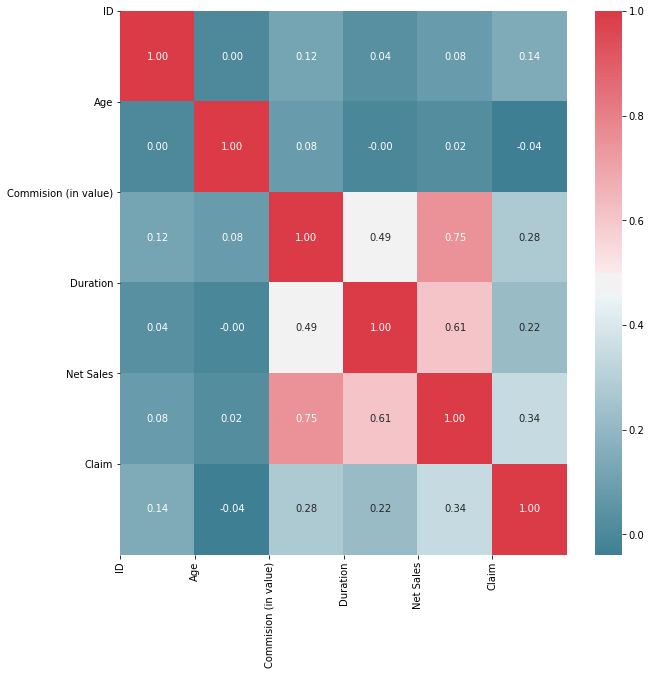

In [20]:
heatMap(numeric_df)

In [21]:
categorical_df = df[list(set(df.columns) - set(numeric_df.columns))]
categorical_df.head()

,Agency,Product Name,Destination,Agency Type,Distribution Channel
0,C2B,Silver Plan,SINGAPORE,Airlines,Online
1,JZI,Basic Plan,PHILIPPINES,Airlines,Online
2,EPX,Cancellation Plan,UNITED STATES,Travel Agency,Online
3,EPX,Cancellation Plan,SAUDI ARABIA,Travel Agency,Online
4,CWT,Rental Vehicle Excess Insurance,THAILAND,Travel Agency,Online


In [22]:
for column in categorical_df.columns:
    print('--------------------------------')
    print(column)
    print(categorical_df[column].value_counts())

--------------------------------
Agency
EPX    30414
C2B    13605
CWT     7955
JZI     5406
LWC      978
SSI      921
JWT      624
RAB      600
KML      445
TST      440
ART      271
CCR      211
TTW      130
CBH       99
CSR       75
ADM       65
Name: Agency, dtype: int64
--------------------------------
Product Name
Cancellation Plan                       15354
2 way Comprehensive Plan                12254
Rental Vehicle Excess Insurance          7955
Bronze Plan                              5882
Basic Plan                               4655
Silver Plan                              3645
Annual Silver Plan                       3143
1 way Comprehensive Plan                 2806
Value Plan                               2372
Ticket Protector                          921
Gold Plan                                 513
Travel Cruise Protect                     440
Annual Gold Plan                          422
Comprehensive Plan                        371
Single Trip Travel Protect Gold    

In [23]:
categorical_df = categorical_df.replace('unknown', np.nan)


In [24]:
import scipy.stats as ss
def heatMap_cat(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

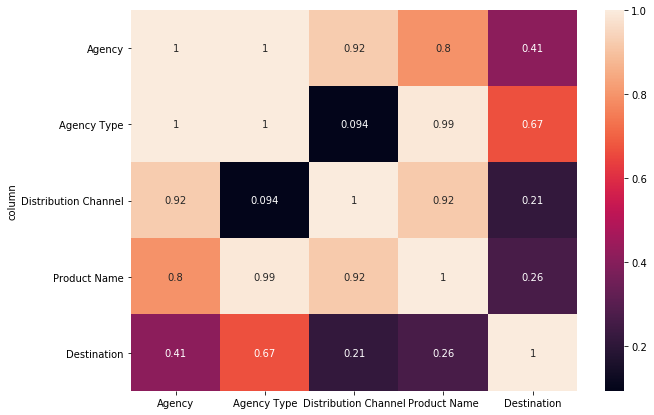

In [25]:
categorical=['Agency', 'Agency Type', 'Distribution Channel','Product Name','Destination']
cat=pd.DataFrame({i:[heatMap_cat(df[i],df[j]) for j in categorical] for i in categorical})
cat['column']=[i for i in categorical if i not in ['memberid']]
cat.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cat,annot=True)
plt.show()

In [26]:
cleaned_df = pd.concat([numeric_df, categorical_df], axis=1)


# Univariate analysis of numerical columns

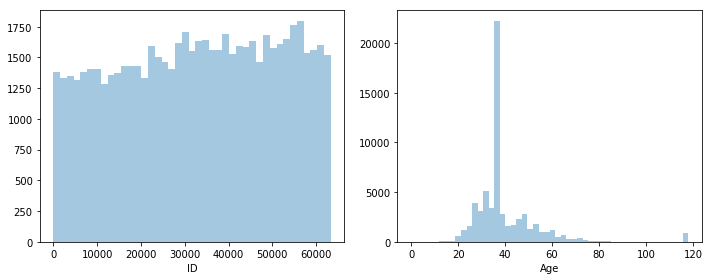

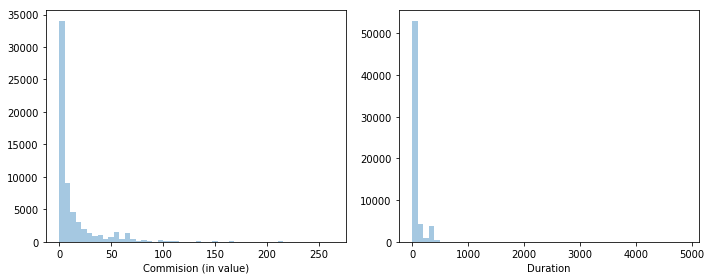

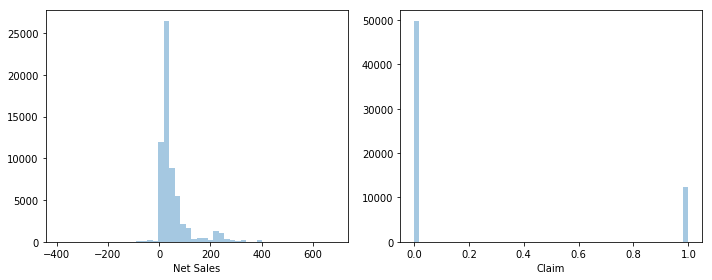

In [27]:
num_cols = numeric_df.columns;
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(cleaned_df[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(cleaned_df[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[num_cols[i]], kde=False)

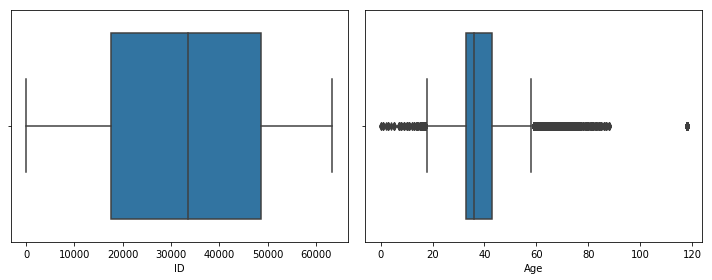

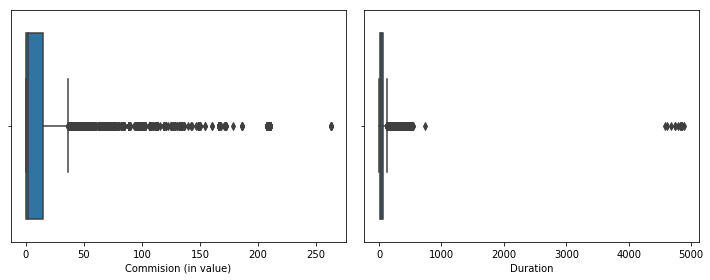

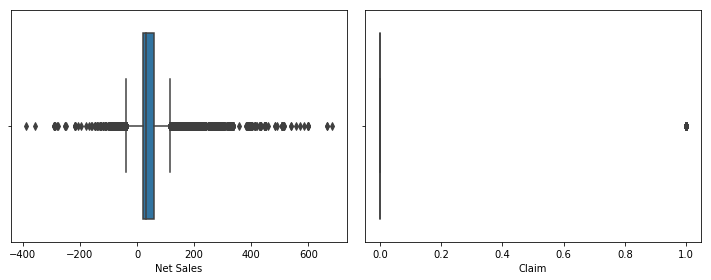

In [28]:
num_cols = numeric_df.columns;
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(cleaned_df[num_cols[i]])
        plt.subplot(122)            
        sns.boxplot(cleaned_df[num_cols[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[num_cols[i]], kde=False)

# Detect outliers in numerical columns

In [29]:

winsorized_numeric_df = numeric_df.copy()
for column in winsorized_numeric_df.columns:
    winsorized_numeric_df[column] = winsorize(winsorized_numeric_df[column], limits=[0.05, 0.1],inclusive=(True, True))

In [30]:
for column in numeric_df.columns:
    q1 = numeric_df[column].quantile(0.25)
    q3 = numeric_df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    
    print(column + ' ---------', numeric_df.loc[(numeric_df[column] < fence_low) | (numeric_df[column] > fence_high)].shape[0])

ID --------- 0
Age --------- 4687
Commision (in value) --------- 7360
Duration --------- 6758
Net Sales --------- 5563
Claim --------- 12458


In [31]:
for column in winsorized_numeric_df.columns:
    q1 = winsorized_numeric_df[column].quantile(0.25)
    q3 = winsorized_numeric_df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    
    print(column + ' ---------', winsorized_numeric_df.loc[(winsorized_numeric_df[column] < fence_low) | (winsorized_numeric_df[column] > fence_high)].shape[0])

ID --------- 0
Age --------- 0
Commision (in value) --------- 7360
Duration --------- 6758
Net Sales --------- 0
Claim --------- 12458


# Univariate analysis of categorical columns

In [32]:
columns = list(categorical_df.columns)
print(columns)

['Agency', 'Product Name', 'Destination', 'Agency Type', 'Distribution Channel']


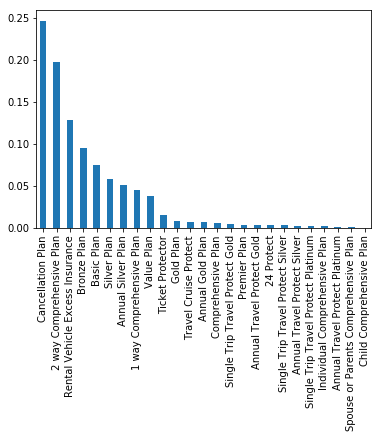

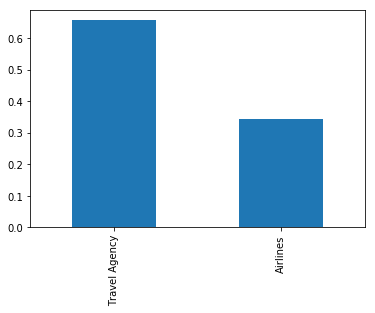

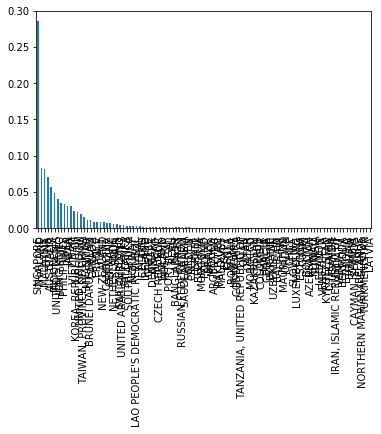

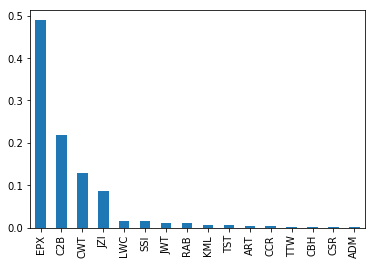

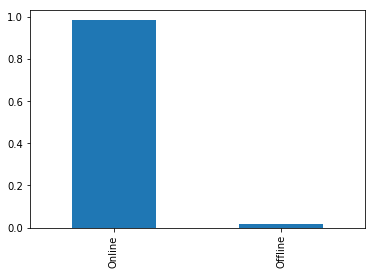

In [33]:
cleaned_df['Product Name'].value_counts(normalize=True).plot.bar()
plt.show()
cleaned_df['Agency Type'].value_counts(normalize=True).plot.bar()
plt.show()
cleaned_df['Destination'].value_counts(normalize=True).plot.bar()
plt.show()
cleaned_df['Agency'].value_counts(normalize=True).plot.bar()
plt.show()
cleaned_df['Distribution Channel'].value_counts(normalize=True).plot.bar()
plt.show()

In [34]:
cleaned_df2 = pd.concat([winsorized_numeric_df, categorical_df], axis=1)

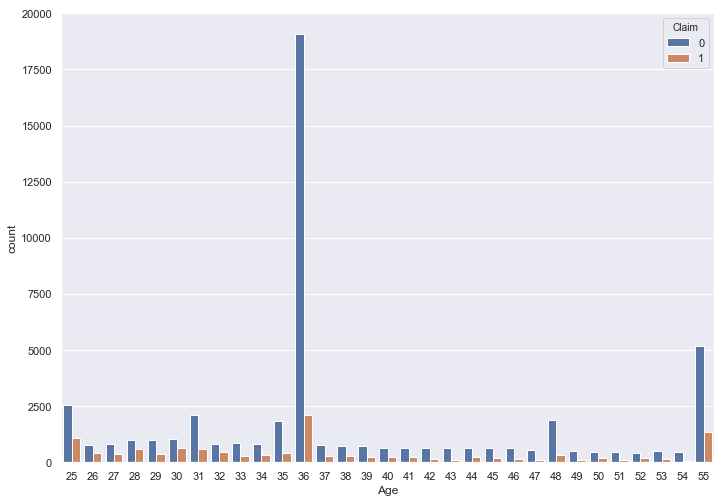

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Age', hue='Claim', data=cleaned_df2)

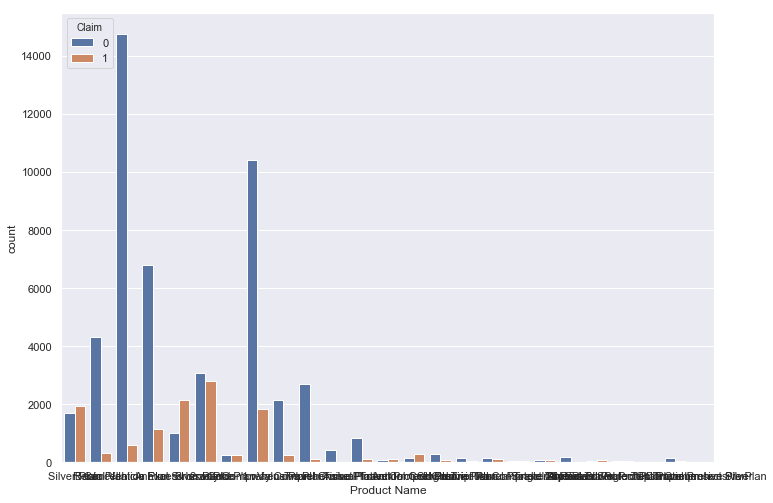

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Product Name', hue='Claim', data=cleaned_df2)


# Testing data for models

In [37]:
def logistic_regression(df):
    X = df.drop(['Claim'], axis=1)
    y = df['Claim']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    print(log_reg.score(X_test, y_test))
    print(classification_report(y_test, y_pred))

# Label encoding the categorical variables

In [38]:
encoder = LabelEncoder()
categorical_df_encoded = categorical_df.apply(encoder.fit_transform)
encoded_df = pd.concat([winsorized_numeric_df, categorical_df_encoded], axis=1)

In [39]:
logistic_regression(encoded_df)


C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.829423736075407
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     14935
           1       0.65      0.32      0.43      3737

   micro avg       0.83      0.83      0.83     18672
   macro avg       0.75      0.64      0.66     18672
weighted avg       0.81      0.83      0.81     18672



In [40]:
def random_forrest(df):
    X = df.drop(['Claim'], axis=1)
    y = df['Claim']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    print(rfc.score(X_test, y_test))
    print(classification_report(y_test, y_pred))
    return rfc

In [41]:
rfc = random_forrest(encoded_df)


C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.991805912596401
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14935
           1       0.96      1.00      0.98      3737

   micro avg       0.99      0.99      0.99     18672
   macro avg       0.98      0.99      0.99     18672
weighted avg       0.99      0.99      0.99     18672



# Feature Selection

In [42]:
pd.Series(rfc.feature_importances_, index=encoded_df.columns[:-1]).sort_values().tail(10)


Agency Type             0.003638
Agency                  0.032511
Destination             0.054097
Commision (in value)    0.065307
Product Name            0.067575
Claim                   0.096316
Age                     0.115843
Net Sales               0.137386
Duration                0.171290
ID                      0.256038
dtype: float64

In [43]:
corr = df.corr()            ## coorelation
corr

,ID,Age,Commision (in value),Duration,Net Sales,Claim
ID,1.000000,0.003958,0.115863,0.037209,0.080519,0.144795
Age,0.003958,1.000000,0.080295,-0.002715,0.021475,-0.038572
Commision (in value),0.115863,0.080295,1.000000,0.492920,0.750238,0.276373
Duration,0.037209,-0.002715,0.492920,1.000000,0.606667,0.216917
Net Sales,0.080519,0.021475,0.750238,0.606667,1.000000,0.344836
Claim,0.144795,-0.038572,0.276373,0.216917,0.344836,1.000000


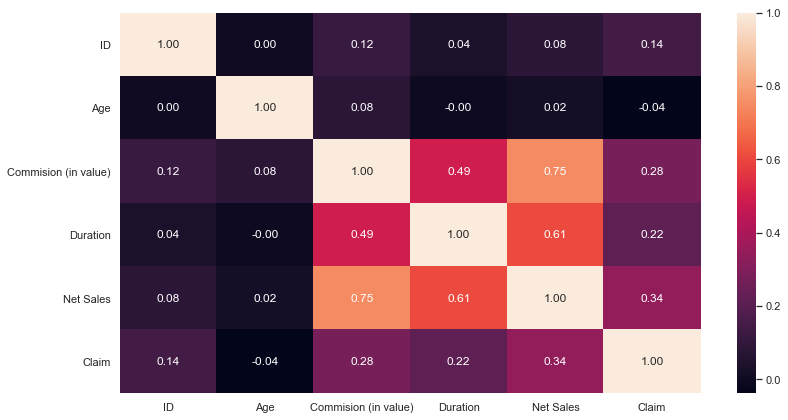

In [44]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

In [45]:
def logistic_regression_rfe(df):
    X = df.drop(['Claim'], axis=1)
    y = df['Claim']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    log_reg = LogisticRegression()
    rfe = RFE(log_reg, 8)
    rfe = rfe.fit(X, y)
    print(rfe.ranking_)
    
    return pd.Series(rfe.ranking_, index=X.columns)

C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[3 1 1 2 1 1 1 1 1 1]


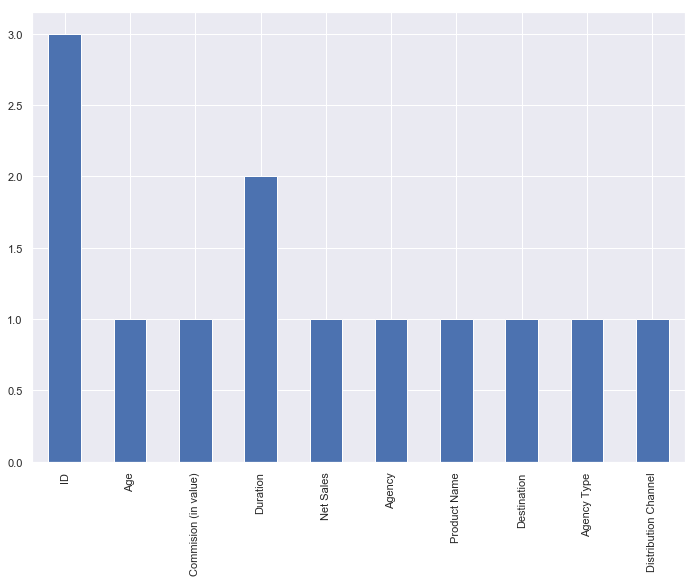

In [46]:
rfe = logistic_regression_rfe(encoded_df)
rfe.plot(kind='bar')

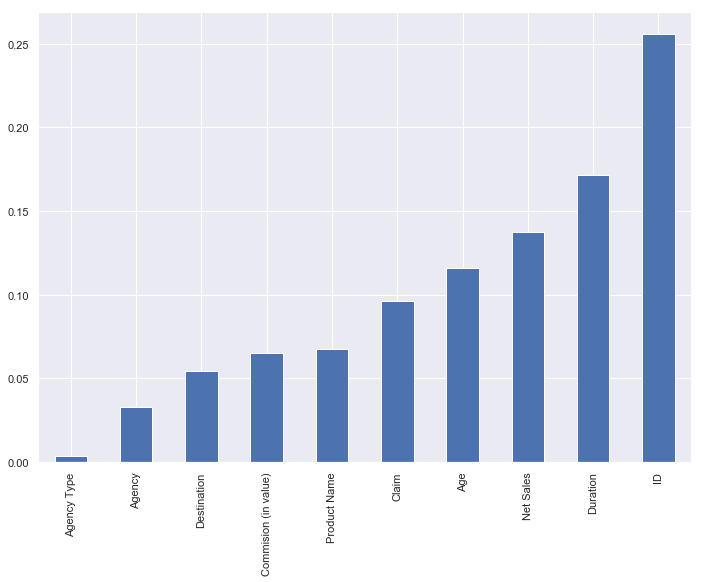

In [47]:
rfc_importances = pd.Series(rfc.feature_importances_, index=encoded_df.columns[:-1]).sort_values().tail(10)
rfc_importances.plot(kind='bar')

In [48]:
columns_selected = list(set(rfc_importances.index).union(set(rfe.index)))


In [49]:
columns_selected

['Commision (in value)',
 'Claim',
 'Product Name',
 'Destination',
 'Duration',
 'Agency',
 'ID',
 'Net Sales',
 'Agency Type',
 'Distribution Channel',
 'Age']

In [50]:
df2 = encoded_df[columns_selected]

In [51]:
df2.head()

,Commision (in value),Claim,Product Name,Destination,Duration,Agency,ID,Net Sales,Agency Type,Distribution Channel,Age
0,28.13,1,17,79,34,2,45341,110.0,0,1,28
1,12.95,0,8,72,53,9,12958,37.0,0,1,37
2,0.00,0,10,96,28,7,18233,13.0,1,1,27
3,0.00,0,10,78,3,7,31742,34.0,1,1,36
4,23.76,0,16,88,33,6,14381,39.6,1,1,26


In [52]:
def random_forrest_2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    print(rfc.score(X_test, y_test))
    print(classification_report(y_test, y_pred))
    return rfc

In [53]:
random_forrest_2(df2, encoded_df['Claim'])


C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14935
           1       1.00      1.00      1.00      3737

   micro avg       1.00      1.00      1.00     18672
   macro avg       1.00      1.00      1.00     18672
weighted avg       1.00      1.00      1.00     18672



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:

X = df2
y = encoded_df["Claim"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print(classification_report(y_test, y_pred))

C:\Users\swapn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9909490145672665
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14935
           1       0.96      1.00      0.98      3737

   micro avg       0.99      0.99      0.99     18672
   macro avg       0.98      0.99      0.99     18672
weighted avg       0.99      0.99      0.99     18672



In [55]:
test_data = pd.read_csv('C:/Users/swapn/DSP22062019/hacktest1.csv')

In [58]:
test_data.head()

,Net Sales,Duration,Agency Type,ID,Product Name,Commision (in value),Destination,Distribution Channel,Age,Agency
0,59.0,91,1,26611,10,0.00,15,1,36,7
1,26.5,24,0,50772,9,6.63,74,1,55,2
2,10.0,145,1,57038,10,0.00,26,1,35,7
3,94.0,42,1,5466,1,0.00,40,1,36,7
4,36.5,12,1,57038,18,23.73,81,1,55,11


In [56]:
pred1 = rfc.predict(test_data)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 10 

In [ ]:
sub = pd.read_csv('C:/Users/swapn/DSP22062019/file/sample_submission.csv')

In [ ]:
sub['Claim'] = pred1

In [ ]:
sub.head()

In [ ]:
sub['Claim'].value_counts()

In [ ]:
sub.to_csv('subhack1.csv',index=False)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict(X_test))


In [ ]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:

X = df2
y = encoded_df["Claim"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(log_reg.score(X_test, y_test))
print(classification_report(y_test, y_pred))


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict(X_test))


NameError: name 'fpr' is not defined

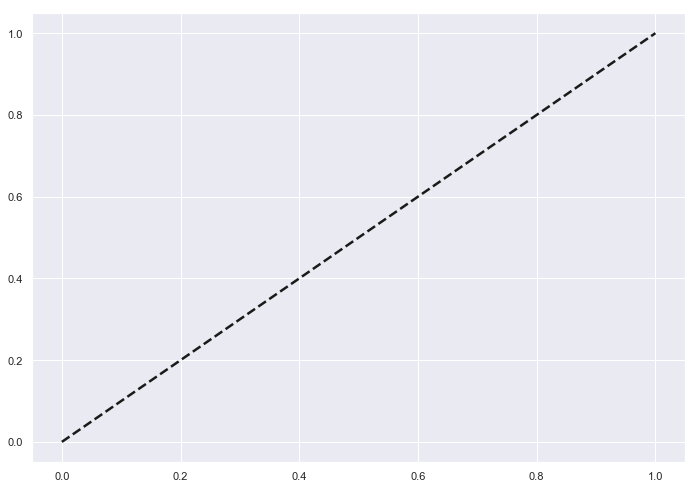

In [61]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Code starts here
cf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f_score = f1_score(y_test, y_pred) 
print(acc,'\n',cf,'\n',precision,'\n',recall,'\n',f_score)

0.9909490145672665 
 [[14780   155]
 [   14  3723]] 
 0.9600309437854564 
 0.9962536794219963 
 0.9778069599474721
